In [29]:
import pandas as pd

In [30]:
csv = pd.read_csv('online_shoppers_intention.csv')
csv.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [31]:
csv.shape

(12330, 18)

In [32]:
csv.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [33]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [34]:
!pip install imbalanced-learn

from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [35]:
label_encoder = LabelEncoder()
csv['Month'] = label_encoder.fit_transform(csv['Month'])
csv['VisitorType'] = label_encoder.fit_transform(csv['VisitorType'])

In [36]:
csv

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,False,False


In [37]:
X = csv.drop('Revenue', axis=1)
y = csv['Revenue']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
smote_enn = SMOTEENN(random_state=2)
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X_train, y_train)

In [40]:
from collections import Counter

print('Before SMOTEENN:', Counter(y_train))
print('After SMOTEENN:', Counter(y_smoteenn))

Before SMOTEENN: Counter({False: 8367, True: 1497})
After SMOTEENN: Counter({True: 7234, False: 5841})


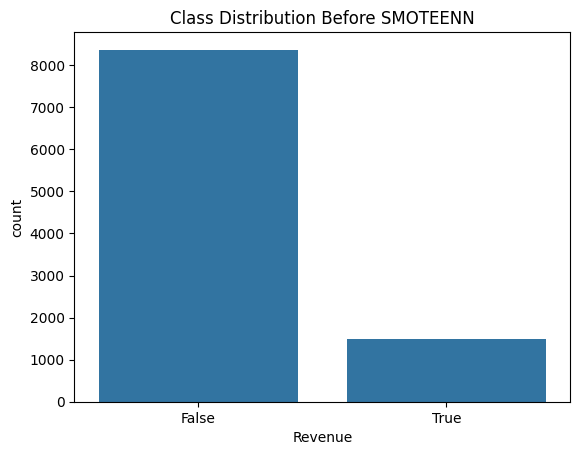

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.countplot(x1=y_smoteenn)
plt.clf()
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTEENN")
plt.show()

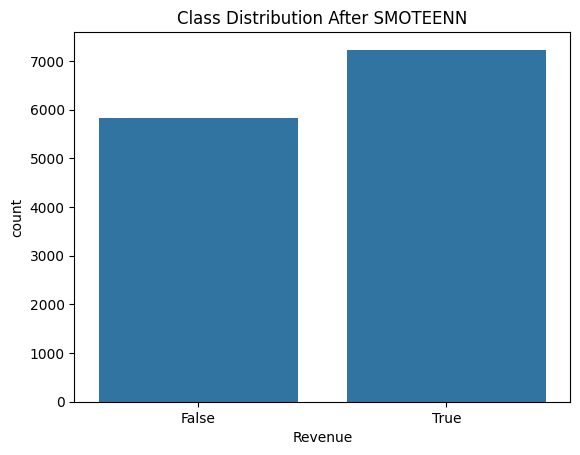

In [42]:
plt.clf()
sns.countplot(x=y_smoteenn)
plt.title("Class Distribution After SMOTEENN")
plt.show()

In [43]:
scaler = StandardScaler()
X_scoteenn_scaled = scaler.fit_transform(X_smoteenn)
X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
# kernel defines how the algorithm maps you input data into higher-dimensional space to find optimal decision boudary.
# rbf means 'radial basis function' and transforms data into a Gaussian funciton to create complex boundaries
# C is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error
# gamma defines how far the influence of a single training example reaches
# 'scale' means that the model will automatically determine the optimal gamma value based on the number of features

svm.fit(X_scoteenn_scaled, y_smoteenn)

SVC(C=1, random_state=42)

In [51]:
svm.score(X_test_scaled, y_test)

0.8532035685320357

In [53]:
y_pred_svm = svm.predict(X_test_scaled)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svm))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

       False       0.95      0.87      0.91      2055
        True       0.54      0.76      0.63       411

    accuracy                           0.85      2466
   macro avg       0.74      0.81      0.77      2466
weighted avg       0.88      0.85      0.86      2466

Confusion Matrix:
 [[1793  262]
 [ 100  311]]
ROC AUC Score: 0.8145985401459853


In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_scoteenn_scaled, y_smoteenn)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
